In [1]:
import sklearn
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('incurance_new.csv')
df.head()

,Unnamed: 0,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_New,Vehicle_Age_new,Vehicle_Damage_New,Premium_new
0,0,1,28.0,0,40454.0,26.0,217,1,1,2,1,1
1,1,1,3.0,0,33536.0,26.0,183,0,1,1,0,1
2,2,1,28.0,0,38294.0,26.0,27,1,1,2,1,1
3,3,1,11.0,1,28619.0,152.0,203,0,1,0,0,0
4,4,1,41.0,1,27496.0,152.0,39,0,0,0,0,0


In [5]:
df.dtypes

Unnamed: 0                int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
Gender_New                int64
Vehicle_Age_new           int64
Vehicle_Damage_New        int64
Premium_new               int64
dtype: object

In [6]:
del df['Unnamed: 0']

In [7]:
df.dtypes

Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
Gender_New                int64
Vehicle_Age_new           int64
Vehicle_Damage_New        int64
Premium_new               int64
dtype: object

# modeling

## splitting data

In [10]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [11]:
X = df.drop(columns='Response')
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, stratify=y, random_state=42)

## base model

### logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr=LogisticRegression()

In [14]:
lr.fit(X_train,y_train)

LogisticRegression()

In [15]:
y_pred_LR = lr.predict(X_test)
y_pred_train_LR = lr.predict(X_train)

### KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred_KNN = knn.predict(X_test)
y_pred_train_KNN = knn.predict(X_train)

### random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred_RF = RF.predict(X_test)
y_pred_train_RF = RF.predict(X_train)

## evaluation result

### logreg

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [25]:
print(classification_report(y_test, y_pred_LR))  #test data

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66880
           1       0.28      0.06      0.10      9342

    accuracy                           0.87     76222
   macro avg       0.58      0.52      0.51     76222
weighted avg       0.81      0.87      0.83     76222



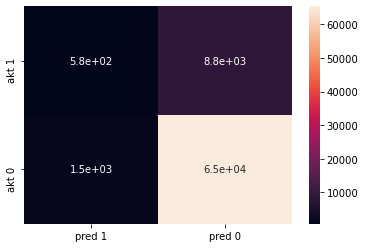

In [27]:
cm_logreg_test=confusion_matrix(y_test,y_pred_LR,labels=[1,0])
df_logreg_test=pd.DataFrame(data=cm_logreg_test,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_logreg_test,annot=True)
plt.show()

In [28]:
df_logreg_test

,pred 1,pred 0
akt 1,583,8759
akt 0,1474,65406


In [29]:
print(classification_report(y_train, y_pred_train_LR)) #train

              precision    recall  f1-score   support

           0       0.88      0.98      0.93    267519
           1       0.28      0.06      0.10     37368

    accuracy                           0.86    304887
   macro avg       0.58      0.52      0.52    304887
weighted avg       0.81      0.86      0.83    304887



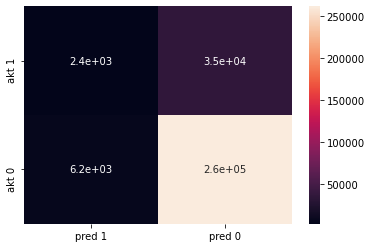

In [30]:
cm_logreg_train=confusion_matrix(y_train,y_pred_train_LR,labels=[1,0])
df_logreg_train=pd.DataFrame(data=cm_logreg_train,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_logreg_train,annot=True)
plt.show()

In [31]:
df_logreg_train

,pred 1,pred 0
akt 1,2377,34991
akt 0,6203,261316


### KNN

In [32]:
print(classification_report(y_test, y_pred_KNN)) 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     66880
           1       0.20      0.05      0.08      9342

    accuracy                           0.86     76222
   macro avg       0.54      0.51      0.50     76222
weighted avg       0.80      0.86      0.82     76222



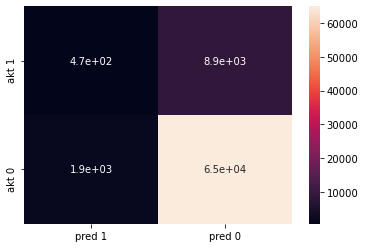

In [33]:
cm_knn_test=confusion_matrix(y_test,y_pred_KNN,labels=[1,0])
df_knn_test=pd.DataFrame(data=cm_knn_test,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_knn_test,annot=True)
plt.show()

In [34]:
df_knn_test

,pred 1,pred 0
akt 1,474,8868
akt 0,1884,64996


In [35]:
print(classification_report(y_train, y_pred_train_KNN)) 

              precision    recall  f1-score   support

           0       0.89      0.99      0.94    267519
           1       0.62      0.15      0.25     37368

    accuracy                           0.88    304887
   macro avg       0.75      0.57      0.59    304887
weighted avg       0.86      0.88      0.85    304887



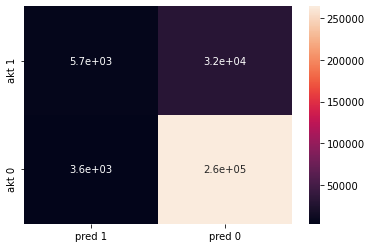

In [36]:
cm_knn_train=confusion_matrix(y_train,y_pred_train_KNN,labels=[1,0])
df_knn_train=pd.DataFrame(data=cm_knn_train,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_knn_train,annot=True)
plt.show()

In [37]:
df_knn_train

,pred 1,pred 0
akt 1,5738,31630
akt 0,3583,263936


### random forest

In [41]:
print(classification_report(y_test, y_pred_RF))  ## test

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     66880
           1       0.31      0.14      0.20      9342

    accuracy                           0.85     76222
   macro avg       0.60      0.55      0.56     76222
weighted avg       0.82      0.85      0.83     76222



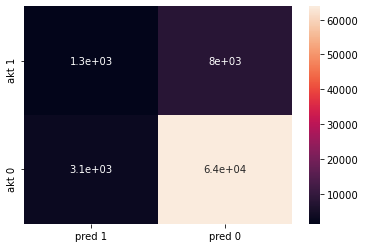

In [42]:
cm_rf_test=confusion_matrix(y_test,y_pred_RF,labels=[1,0])
df_rf_test=pd.DataFrame(data=cm_rf_test,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_rf_test,annot=True)
plt.show()

In [43]:
df_rf_test

,pred 1,pred 0
akt 1,1343,7999
akt 0,3056,63824


In [45]:
print(classification_report(y_train, y_pred_train_RF))  ## train

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267519
           1       0.99      0.98      0.98     37368

    accuracy                           1.00    304887
   macro avg       0.99      0.99      0.99    304887
weighted avg       1.00      1.00      1.00    304887



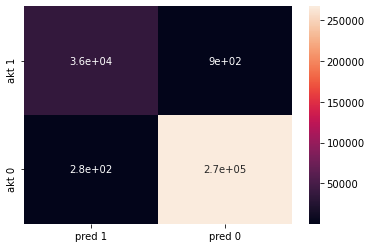

In [46]:
cm_rf_train=confusion_matrix(y_train,y_pred_train_RF,labels=[1,0])
df_rf_train=pd.DataFrame(data=cm_rf_train,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_rf_train,annot=True)
plt.show()

In [47]:
df_rf_train

,pred 1,pred 0
akt 1,36473,895
akt 0,278,267241


- the evaluation matrix of the result is so bad, especially in recall and precision

# tuning

## logreg

In [48]:
tune_LR = LogisticRegression(class_weight={0:.12, 1:.88})
tune_LR.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.12, 1: 0.88})

In [49]:
y_tune_LR = tune_LR.predict(X_test)
y_tune_train_LR = tune_LR.predict(X_train)

In [51]:
print(classification_report(y_train, y_tune_train_LR))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78    267519
           1       0.18      0.49      0.26     37368

    accuracy                           0.66    304887
   macro avg       0.54      0.59      0.52    304887
weighted avg       0.82      0.66      0.72    304887



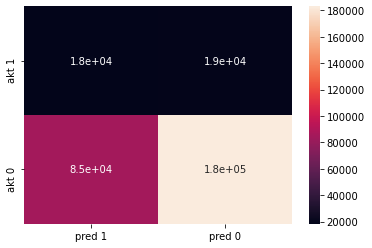

In [52]:
cm_logreg_tuning=confusion_matrix(y_train,y_tune_train_LR,labels=[1,0])
df_logreg_tuning=pd.DataFrame(data=cm_logreg_tuning,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_logreg_tuning,annot=True)
plt.show()

In [53]:
df_logreg_tuning

,pred 1,pred 0
akt 1,18302,19066
akt 0,84556,182963


In [54]:
print(classification_report(y_test, y_tune_LR))  ## Test

              precision    recall  f1-score   support

           0       0.91      0.68      0.78     66880
           1       0.18      0.49      0.26      9342

    accuracy                           0.66     76222
   macro avg       0.54      0.59      0.52     76222
weighted avg       0.82      0.66      0.72     76222



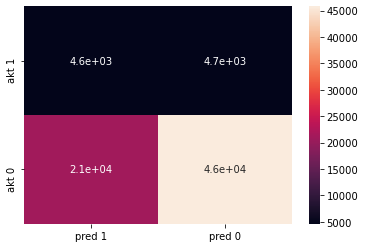

In [55]:
cm_logreg_test_tuning=confusion_matrix(y_test,y_tune_LR,labels=[1,0])
df_logreg_test_tuning=pd.DataFrame(data=cm_logreg_test_tuning,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_logreg_test_tuning,annot=True)
plt.show()

In [56]:
df_logreg_test_tuning

,pred 1,pred 0
akt 1,4613,4729
akt 0,21071,45809


### knn

In [59]:
tune_KNN = KNeighborsClassifier()

param_KNN = {"n_neighbors" : [5, 15, 25, 35, 70],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

In [60]:
model_KNN = GridSearchCV(estimator=tune_KNN, param_grid=param_KNN, n_jobs = -1, cv = 2, verbose=1, scoring='recall')

In [61]:
model_KNN.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.6min finished


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 15, 25, 35, 70], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [62]:
KNN_Tuned = model_KNN.best_estimator_
y_tuned_KNN = KNN_Tuned.predict(X_test)
y_tuned_train_KNN = KNN_Tuned.predict(X_train)

In [63]:
print(classification_report(y_train, y_tuned_train_KNN))  ## Train

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267519
           1       1.00      0.97      0.98     37368

    accuracy                           1.00    304887
   macro avg       1.00      0.99      0.99    304887
weighted avg       1.00      1.00      1.00    304887



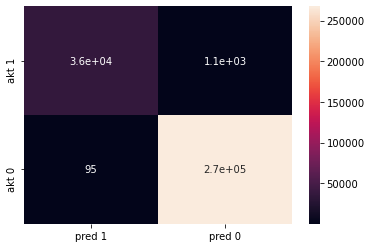

In [64]:
cm_knn_tuning=confusion_matrix(y_train,y_tuned_train_KNN,labels=[1,0])
df_knn_tuning=pd.DataFrame(data=cm_knn_tuning,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_knn_tuning,annot=True)
plt.show()

In [65]:
df_knn_tuning

,pred 1,pred 0
akt 1,36301,1067
akt 0,95,267424


In [66]:
print(classification_report(y_test, y_tuned_KNN))  ## Test

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     66880
           1       0.22      0.08      0.12      9342

    accuracy                           0.85     76222
   macro avg       0.55      0.52      0.52     76222
weighted avg       0.80      0.85      0.82     76222



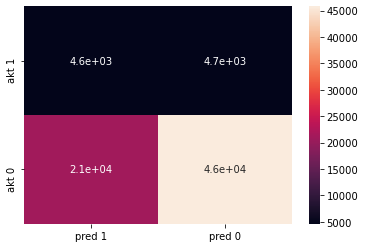

In [67]:
cm_knn_test_tuning=confusion_matrix(y_test,y_tune_LR,labels=[1,0])
df_knn_test_tuning=pd.DataFrame(data=cm_knn_test_tuning,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_knn_test_tuning,annot=True)
plt.show()

In [68]:
df_knn_test_tuning

,pred 1,pred 0
akt 1,4613,4729
akt 0,21071,45809


### random forest

In [69]:
tune_RF = RandomForestClassifier()

param_RF ={"max_depth" : [None, 5, 7, 9],
          "min_samples_split" : [2, 9, 15],
          "min_samples_leaf" : [1, 2, 5],
          "max_features" : [None, .8, .7]}

In [70]:
model_RF = GridSearchCV(estimator=tune_RF, param_grid=param_RF, cv = 2, n_jobs=-1, verbose=1)

In [71]:
model_RF.fit(X_train, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 28.4min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 7, 9],
                         'max_features': [None, 0.8, 0.7],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 9, 15]},
             verbose=1)

In [72]:
RF_tuned = model_RF.best_estimator_
y_tuned_RF = RF_tuned.predict(X_test)
y_tuned_train_RF = RF_tuned.predict(X_train)

In [75]:
print(classification_report(y_train, y_tuned_train_RF))  ## Train

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    267519
           1       0.70      0.00      0.00     37368

    accuracy                           0.88    304887
   macro avg       0.79      0.50      0.47    304887
weighted avg       0.86      0.88      0.82    304887



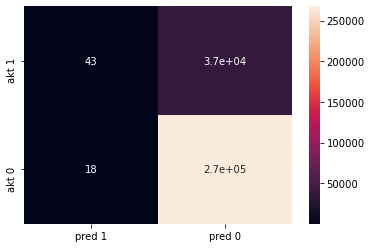

In [73]:
cm_rf_tuning=confusion_matrix(y_train,y_tuned_train_RF,labels=[1,0])
df_rf_tuning=pd.DataFrame(data=cm_rf_tuning,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_rf_tuning,annot=True)
plt.show()

In [74]:
df_rf_tuning

,pred 1,pred 0
akt 1,43,37325
akt 0,18,267501


In [76]:
print(classification_report(y_test, y_tuned_RF)) ## Test

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.56      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.72      0.50      0.47     76222
weighted avg       0.84      0.88      0.82     76222



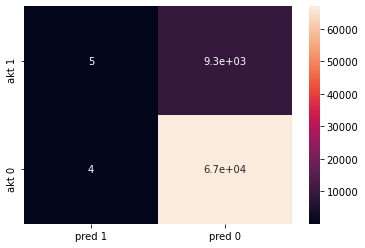

In [77]:
cm_rf_test_tuning=confusion_matrix(y_test,y_tuned_RF,labels=[1,0])
df_rf_test_tuning=pd.DataFrame(data=cm_rf_test_tuning,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_rf_test_tuning,annot=True)
plt.show()

In [78]:
df_rf_test_tuning

,pred 1,pred 0
akt 1,5,9337
akt 0,4,66876


# result

In [81]:
prec_train_LR = precision_score(y_train, y_pred_train_LR)
prec_train_KNN = precision_score(y_train, y_pred_train_KNN)
prec_train_RF = precision_score(y_train, y_pred_train_RF)

prec_test_LR = precision_score(y_test, y_pred_LR)
prec_test_KNN = precision_score(y_test, y_pred_KNN)
prec_test_RF = precision_score(y_test, y_pred_RF)

rec_train_LR = recall_score(y_train, y_pred_train_LR)
rec_train_KNN = recall_score(y_train, y_pred_train_KNN)
rec_train_RF = recall_score(y_train, y_pred_train_RF)

rec_test_LR = recall_score(y_test, y_pred_LR)
rec_test_KNN = recall_score(y_test, y_pred_KNN)
rec_test_RF = recall_score(y_test, y_pred_RF)

data_base = {
    'Precision_Train':[prec_train_LR, prec_train_KNN, prec_train_RF],
    'Precision_Test':[prec_test_LR, prec_test_KNN, prec_test_RF],
    'Recall_Train':[rec_train_LR, rec_train_KNN, rec_train_RF],
    'Recall_Test':[rec_test_LR, rec_test_KNN, rec_test_RF]
}

pd.DataFrame(data=data_base, index=['LogReg','KNN_Clas','RF_Clas'])

,Precision_Train,Precision_Test,Recall_Train,Recall_Test
LogReg,0.277040,0.283422,0.063611,0.062406
KNN_Clas,0.615599,0.201018,0.153554,0.050739
RF_Clas,0.992436,0.305297,0.976049,0.143759


In [84]:
datas=pd.DataFrame(data=data_base, index=['LogReg','KNN_Clas','RF_Clas'])

In [79]:
prec_train_LR = precision_score(y_train, y_tune_train_LR)
prec_train_KNN = precision_score(y_train, y_tuned_train_KNN)
prec_train_RF = precision_score(y_train, y_tuned_train_RF)

prec_test_LR = precision_score(y_test, y_tune_LR)
prec_test_KNN = precision_score(y_test, y_tuned_KNN)
prec_test_RF = precision_score(y_test, y_tuned_RF)

rec_train_LR = recall_score(y_train, y_tune_train_LR)
rec_train_KNN = recall_score(y_train, y_tuned_train_KNN)
rec_train_RF = recall_score(y_train, y_tuned_train_RF)

rec_test_LR = recall_score(y_test, y_tune_LR)
rec_test_KNN = recall_score(y_test, y_tuned_KNN)
rec_test_RF = recall_score(y_test, y_tuned_RF)

In [80]:
data = {
    'Precision_Train':[prec_train_LR, prec_train_KNN, prec_train_RF],
    'Precision_Test':[prec_test_LR, prec_test_KNN, prec_test_RF],
    'Recall_Train':[rec_train_LR, rec_train_KNN, rec_train_RF],
    'Recall_Test':[rec_test_LR, rec_test_KNN, rec_test_RF],
}

pd.DataFrame(data=data, index=['LogReg_US_Tuned','KNN_US_Tuned','RF_US_Tuned'])

,Precision_Train,Precision_Test,Recall_Train,Recall_Test
LogReg_US_Tuned,0.177935,0.179606,0.489777,0.493791
KNN_US_Tuned,0.997390,0.216530,0.971446,0.081888
RF_US_Tuned,0.704918,0.555556,0.001151,0.000535


In [85]:
datass=pd.DataFrame(data=data, index=['LogReg_US_Tuned','KNN_US_Tuned','RF_US_Tuned'])

In [86]:
pd.concat([datas, datass])

,Precision_Train,Precision_Test,Recall_Train,Recall_Test
LogReg,0.277040,0.283422,0.063611,0.062406
KNN_Clas,0.615599,0.201018,0.153554,0.050739
RF_Clas,0.992436,0.305297,0.976049,0.143759
LogReg_US_Tuned,0.177935,0.179606,0.489777,0.493791
KNN_US_Tuned,0.997390,0.216530,0.971446,0.081888
RF_US_Tuned,0.704918,0.555556,0.001151,0.000535


- the best score we got is, when we use knn because recall and the precission increasing